In [31]:
import pandas as pd
import numpy as np
import os
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder,minmax_scale
from sklearn import model_selection
import matplotlib.pyplot as plt
from tensorflow import keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras import regularizers

In [32]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [33]:
data = pd.concat([data_train,data_test], axis = 0).drop(['id','random_state'], axis = 1)

In [34]:
#data['penalty'] = LabelEncoder().fit_transform(data['penalty'])
data['alpha'] = LabelEncoder().fit_transform(data['alpha'])
def fun(x):
    if x == -1:
        return 8
    else:
        return x
data['n_jobs'] = data['n_jobs'].apply(lambda x: fun(x))

In [35]:
def penalty(x):
    if x == 'none':
        x = 0
    elif x =='l2':
        x = 1
    elif x =='l1':
        x = 2
    elif x =='elasticnet':
        x = 3
    return x

In [36]:
data['penalty'] = data['penalty'].apply(lambda x: penalty(x))

In [37]:
data.index = range(len(data))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
alpha                   500 non-null int64
flip_y                  500 non-null float64
l1_ratio                500 non-null float64
max_iter                500 non-null int64
n_classes               500 non-null int64
n_clusters_per_class    500 non-null int64
n_features              500 non-null int64
n_informative           500 non-null int64
n_jobs                  500 non-null int64
n_samples               500 non-null int64
penalty                 500 non-null int64
scale                   500 non-null float64
time                    400 non-null float64
dtypes: float64(4), int64(9)
memory usage: 50.9 KB


In [38]:
#import numpy array to DataSet
train_x = data.iloc[0:400,0:12]
train_y = data.iloc[0:400,12]

In [39]:
test_x = data.iloc[400:500,0:12]
test_y = data.iloc[400:500,12]

In [40]:
# get training data
# train_x, test_x, train_y, test_y = train_test_split(data1,label,test_size=0.2,random_state=5)

In [41]:
# Test data is *not* used when calculating the mean and std
train_x = minmax_scale(train_x, feature_range=(0, 1), axis=0, copy=True)
test_x = minmax_scale(test_x, feature_range=(0, 1), axis=0, copy=True)
# mean = train_x.mean(axis=0)
# std = train_x.std(axis=0)
# train_x = (train_x - mean) / std
# test_x = (test_x - mean) / std

In [42]:
def build_model():
    model = keras.Sequential()
    model.add(Dense(256, activation='relu', input_dim=12))
    model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(1, activation='relu'))

    model.compile(loss='mse',
                    optimizer='adam',
                    metrics=['mae'])
    
    
    
    return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               3328      
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 135,169
Trainable params: 135,169
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Display training progress by printing a single dot for each completed epoch
EPOCHS = 500

# Store training stats
history = model.fit(train_x, train_y, epochs=EPOCHS,
                    
                    validation_split=0.1, verbose=1,
                    
                    batch_size=5)

Train on 360 samples, validate on 40 samples
Epoch 1/500
360/360 [==============================] - 1s 2ms/step - loss: 28.9853 - mean_absolute_error: 2.6338 - val_loss: 12.2962 - val_mean_absolute_error: 2.2482
Epoch 2/500
360/360 [==============================] - 0s 436us/step - loss: 18.1727 - mean_absolute_error: 2.1577 - val_loss: 10.1710 - val_mean_absolute_error: 2.1696
Epoch 3/500
360/360 [==============================] - 0s 431us/step - loss: 14.4155 - mean_absolute_error: 1.9101 - val_loss: 8.0819 - val_mean_absolute_error: 1.6077
Epoch 4/500
360/360 [==============================] - 0s 462us/step - loss: 12.2000 - mean_absolute_error: 1.7335 - val_loss: 6.5765 - val_mean_absolute_error: 1.2438
Epoch 5/500
360/360 [==============================] - 0s 441us/step - loss: 9.7652 - mean_absolute_error: 1.5667 - val_loss: 8.7686 - val_mean_absolute_error: 1.6271
Epoch 6/500
360/360 [==============================] - 0s 437us/step - loss: 8.3166 - mean_absolute_error: 1.3773 - 

360/360 [==============================] - 0s 435us/step - loss: 2.6264 - mean_absolute_error: 0.7399 - val_loss: 2.6328 - val_mean_absolute_error: 0.8648
Epoch 50/500
360/360 [==============================] - 0s 424us/step - loss: 1.6938 - mean_absolute_error: 0.5593 - val_loss: 2.1874 - val_mean_absolute_error: 0.7077
Epoch 51/500
360/360 [==============================] - 0s 451us/step - loss: 1.4984 - mean_absolute_error: 0.5038 - val_loss: 1.7846 - val_mean_absolute_error: 0.6571
Epoch 52/500
360/360 [==============================] - 0s 435us/step - loss: 1.3923 - mean_absolute_error: 0.4955 - val_loss: 2.2167 - val_mean_absolute_error: 0.6834
Epoch 53/500
360/360 [==============================] - 0s 411us/step - loss: 1.4683 - mean_absolute_error: 0.5219 - val_loss: 2.0840 - val_mean_absolute_error: 0.7157
Epoch 54/500
360/360 [==============================] - 0s 399us/step - loss: 1.2550 - mean_absolute_error: 0.4697 - val_loss: 2.0223 - val_mean_absolute_error: 0.6910
Epoch

Epoch 98/500
360/360 [==============================] - 0s 452us/step - loss: 0.8117 - mean_absolute_error: 0.3569 - val_loss: 1.5401 - val_mean_absolute_error: 0.6764
Epoch 99/500
360/360 [==============================] - 0s 439us/step - loss: 1.0651 - mean_absolute_error: 0.4416 - val_loss: 1.7970 - val_mean_absolute_error: 0.7362
Epoch 100/500
360/360 [==============================] - 0s 410us/step - loss: 1.0364 - mean_absolute_error: 0.4421 - val_loss: 1.3342 - val_mean_absolute_error: 0.5813
Epoch 101/500
360/360 [==============================] - 0s 402us/step - loss: 0.9171 - mean_absolute_error: 0.4424 - val_loss: 1.3512 - val_mean_absolute_error: 0.5575
Epoch 102/500
360/360 [==============================] - 0s 390us/step - loss: 0.9581 - mean_absolute_error: 0.4492 - val_loss: 1.4424 - val_mean_absolute_error: 0.5867
Epoch 103/500
360/360 [==============================] - 0s 413us/step - loss: 1.1815 - mean_absolute_error: 0.4923 - val_loss: 1.4616 - val_mean_absolute_er

360/360 [==============================] - 0s 444us/step - loss: 0.4951 - mean_absolute_error: 0.2460 - val_loss: 1.1996 - val_mean_absolute_error: 0.5506
Epoch 147/500
360/360 [==============================] - 0s 557us/step - loss: 0.6157 - mean_absolute_error: 0.3269 - val_loss: 1.3640 - val_mean_absolute_error: 0.5985
Epoch 148/500
360/360 [==============================] - 0s 497us/step - loss: 0.7192 - mean_absolute_error: 0.3853 - val_loss: 1.6887 - val_mean_absolute_error: 0.7088
Epoch 149/500
360/360 [==============================] - 0s 454us/step - loss: 1.0053 - mean_absolute_error: 0.4801 - val_loss: 1.2467 - val_mean_absolute_error: 0.6075
Epoch 150/500
360/360 [==============================] - 0s 474us/step - loss: 1.0633 - mean_absolute_error: 0.5121 - val_loss: 3.0757 - val_mean_absolute_error: 0.9666
Epoch 151/500
360/360 [==============================] - 0s 430us/step - loss: 0.9195 - mean_absolute_error: 0.4568 - val_loss: 1.7145 - val_mean_absolute_error: 0.6526


360/360 [==============================] - 0s 455us/step - loss: 0.5060 - mean_absolute_error: 0.3071 - val_loss: 1.1270 - val_mean_absolute_error: 0.5352
Epoch 195/500
360/360 [==============================] - 0s 434us/step - loss: 0.5598 - mean_absolute_error: 0.3091 - val_loss: 0.8946 - val_mean_absolute_error: 0.4976
Epoch 196/500
360/360 [==============================] - 0s 421us/step - loss: 0.5213 - mean_absolute_error: 0.2856 - val_loss: 1.2196 - val_mean_absolute_error: 0.5333
Epoch 197/500
360/360 [==============================] - 0s 427us/step - loss: 0.7220 - mean_absolute_error: 0.3771 - val_loss: 1.0367 - val_mean_absolute_error: 0.5188
Epoch 198/500
360/360 [==============================] - 0s 410us/step - loss: 0.4946 - mean_absolute_error: 0.2829 - val_loss: 0.9250 - val_mean_absolute_error: 0.5148
Epoch 199/500
360/360 [==============================] - 0s 437us/step - loss: 0.3905 - mean_absolute_error: 0.2130 - val_loss: 0.8342 - val_mean_absolute_error: 0.4652


360/360 [==============================] - 0s 437us/step - loss: 0.2994 - mean_absolute_error: 0.1645 - val_loss: 0.8254 - val_mean_absolute_error: 0.4756
Epoch 243/500
360/360 [==============================] - 0s 409us/step - loss: 0.3142 - mean_absolute_error: 0.1758 - val_loss: 0.7620 - val_mean_absolute_error: 0.4733
Epoch 244/500
360/360 [==============================] - 0s 406us/step - loss: 0.4332 - mean_absolute_error: 0.2407 - val_loss: 0.8676 - val_mean_absolute_error: 0.4825
Epoch 245/500
360/360 [==============================] - 0s 412us/step - loss: 1.3096 - mean_absolute_error: 0.5573 - val_loss: 1.4964 - val_mean_absolute_error: 0.6298
Epoch 246/500
360/360 [==============================] - 0s 412us/step - loss: 1.0389 - mean_absolute_error: 0.4860 - val_loss: 0.7917 - val_mean_absolute_error: 0.5238
Epoch 247/500
360/360 [==============================] - 0s 394us/step - loss: 0.6520 - mean_absolute_error: 0.3716 - val_loss: 0.9695 - val_mean_absolute_error: 0.4989


360/360 [==============================] - 0s 407us/step - loss: 1.2626 - mean_absolute_error: 0.6187 - val_loss: 1.0687 - val_mean_absolute_error: 0.6060
Epoch 291/500
360/360 [==============================] - 0s 470us/step - loss: 0.7251 - mean_absolute_error: 0.4123 - val_loss: 1.8648 - val_mean_absolute_error: 0.7490
Epoch 292/500
360/360 [==============================] - 0s 449us/step - loss: 0.7872 - mean_absolute_error: 0.4477 - val_loss: 0.7647 - val_mean_absolute_error: 0.5086
Epoch 293/500
360/360 [==============================] - 0s 433us/step - loss: 0.4358 - mean_absolute_error: 0.2502 - val_loss: 0.9769 - val_mean_absolute_error: 0.5778
Epoch 294/500
360/360 [==============================] - 0s 421us/step - loss: 0.5103 - mean_absolute_error: 0.3066 - val_loss: 0.6747 - val_mean_absolute_error: 0.4407
Epoch 295/500
360/360 [==============================] - 0s 414us/step - loss: 0.3484 - mean_absolute_error: 0.2382 - val_loss: 0.7285 - val_mean_absolute_error: 0.4206


360/360 [==============================] - 0s 396us/step - loss: 2.7143 - mean_absolute_error: 0.9389 - val_loss: 1.8813 - val_mean_absolute_error: 0.8836
Epoch 339/500
360/360 [==============================] - 0s 399us/step - loss: 0.9863 - mean_absolute_error: 0.5482 - val_loss: 1.1148 - val_mean_absolute_error: 0.6137
Epoch 340/500
360/360 [==============================] - 0s 399us/step - loss: 0.5323 - mean_absolute_error: 0.3718 - val_loss: 0.7144 - val_mean_absolute_error: 0.4562
Epoch 341/500
360/360 [==============================] - 0s 404us/step - loss: 0.5146 - mean_absolute_error: 0.3339 - val_loss: 0.6812 - val_mean_absolute_error: 0.4227
Epoch 342/500
360/360 [==============================] - 0s 389us/step - loss: 0.3645 - mean_absolute_error: 0.2543 - val_loss: 0.7296 - val_mean_absolute_error: 0.4318
Epoch 343/500
360/360 [==============================] - 0s 484us/step - loss: 0.3031 - mean_absolute_error: 0.2168 - val_loss: 0.6712 - val_mean_absolute_error: 0.4243


360/360 [==============================] - 0s 429us/step - loss: 0.9937 - mean_absolute_error: 0.4823 - val_loss: 0.5425 - val_mean_absolute_error: 0.3954
Epoch 387/500
360/360 [==============================] - 0s 391us/step - loss: 0.5186 - mean_absolute_error: 0.3478 - val_loss: 1.4262 - val_mean_absolute_error: 0.6809
Epoch 388/500
360/360 [==============================] - 0s 404us/step - loss: 0.4422 - mean_absolute_error: 0.3159 - val_loss: 0.7198 - val_mean_absolute_error: 0.4874
Epoch 389/500
360/360 [==============================] - 0s 399us/step - loss: 0.2841 - mean_absolute_error: 0.2255 - val_loss: 0.6993 - val_mean_absolute_error: 0.4616
Epoch 390/500
360/360 [==============================] - 0s 396us/step - loss: 0.2500 - mean_absolute_error: 0.1969 - val_loss: 0.7803 - val_mean_absolute_error: 0.5003
Epoch 391/500
360/360 [==============================] - 0s 414us/step - loss: 0.2323 - mean_absolute_error: 0.1792 - val_loss: 0.6869 - val_mean_absolute_error: 0.4479


360/360 [==============================] - 0s 420us/step - loss: 0.2466 - mean_absolute_error: 0.1928 - val_loss: 0.5717 - val_mean_absolute_error: 0.4487
Epoch 435/500
360/360 [==============================] - 0s 397us/step - loss: 0.2633 - mean_absolute_error: 0.2034 - val_loss: 0.6686 - val_mean_absolute_error: 0.4373
Epoch 436/500
360/360 [==============================] - 0s 398us/step - loss: 0.2513 - mean_absolute_error: 0.1960 - val_loss: 0.7529 - val_mean_absolute_error: 0.5430
Epoch 437/500
360/360 [==============================] - 0s 404us/step - loss: 0.2860 - mean_absolute_error: 0.2427 - val_loss: 0.5855 - val_mean_absolute_error: 0.3956
Epoch 438/500
360/360 [==============================] - 0s 404us/step - loss: 0.2428 - mean_absolute_error: 0.1940 - val_loss: 0.7883 - val_mean_absolute_error: 0.4822
Epoch 439/500
360/360 [==============================] - 0s 399us/step - loss: 0.2400 - mean_absolute_error: 0.1955 - val_loss: 0.5040 - val_mean_absolute_error: 0.4001


360/360 [==============================] - 0s 408us/step - loss: 0.2851 - mean_absolute_error: 0.2309 - val_loss: 0.8366 - val_mean_absolute_error: 0.5027
Epoch 483/500
360/360 [==============================] - 0s 421us/step - loss: 0.5697 - mean_absolute_error: 0.3687 - val_loss: 0.8735 - val_mean_absolute_error: 0.5066
Epoch 484/500
360/360 [==============================] - 0s 429us/step - loss: 0.2878 - mean_absolute_error: 0.2244 - val_loss: 0.9053 - val_mean_absolute_error: 0.5111
Epoch 485/500
360/360 [==============================] - 0s 395us/step - loss: 0.4288 - mean_absolute_error: 0.3400 - val_loss: 0.6238 - val_mean_absolute_error: 0.4718
Epoch 486/500
360/360 [==============================] - 0s 399us/step - loss: 0.2771 - mean_absolute_error: 0.2251 - val_loss: 0.8004 - val_mean_absolute_error: 0.4957
Epoch 487/500
360/360 [==============================] - 0s 413us/step - loss: 0.2243 - mean_absolute_error: 0.1731 - val_loss: 0.5358 - val_mean_absolute_error: 0.4334


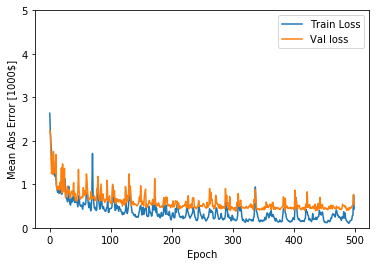

In [44]:
import matplotlib.pyplot as plt


def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
    plt.legend()
    plt.ylim([0, 5])
  
plot_history(history)

In [28]:
[loss, mae] = model.evaluate(train_x, train_y, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

Testing set Mean Abs Error: $ 268.88


In [29]:
test_predictions = model.predict(test_x)

In [30]:
y_predict = pd.DataFrame(test_predictions)

a = list(range(100))
ID = pd.DataFrame(a)

pre = pd.concat([ID, y_predict], axis = 1)

pre.columns = ['Id','time']

pre.to_csv('5001_kaggle_prediction.csv',index = None)